<a href="https://colab.research.google.com/github/oneovernever/DatosGobArg/blob/master/Financiacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
!pip --no-cache-dir install seaborn==0.9.0
import seaborn as sns
sns.set(style="darkgrid")

In [0]:
sns.set(style="ticks", color_codes=True)

Proyectos de Ciencia Tecnología e Innovación
Proyectos de ciencia, tecnología e innovación: montos totales aprobados y financiados, fecha de inicio, provincia de ejecución, región de ejecución, tipo de proyecto, gran área del conocimiento (para proyectos de I+D) y tipo de institución de ejecución (2008-2016)

https://datos.gob.ar/dataset/mincyt-proyectos-ciencia-tecnologia-e-innovacion/archivo/mincyt_5e62bdac-52d9-4e66-ac6b-aa47dd219aa3_0

In [2]:
proy = pd.read_csv('proyectos-cyt.csv')
proy.head()

,proyecto_id,fecha_inicio,pais_id,pais,provincia_id,provincia_de_ejecución,moneda_monto_financiado,monto_financiado,moneda_monto_total,monto_total,region_de_ejecucion,gran_area_conocimiento,tipo_proyecto_cyt,tipo_organizacion_ejec
0,1,2014-02-24,ARG,Argentina,2.0,CABA,ARS,4350000,ARS,7250000,Pampeana,NaN,Tecnología e Innovación,Organismo gubernamental de ciencia y tecnología
1,3,2015-11-18,ARG,Argentina,18.0,Corrientes,ARS,19998933,ARS,24998924,Nea,NaN,Tecnología e Innovación,Consorcio público
2,3,2015-11-18,ARG,Argentina,42.0,La Pampa,ARS,19998933,ARS,24998924,Pampeana,NaN,Tecnología e Innovación,Consorcio público
3,4,2015-03-27,ARG,Argentina,18.0,Corrientes,ARS,2707100,ARS,3383875,Nea,NaN,Tecnología e Innovación,Consorcio público-privado
4,4,2015-03-27,ARG,Argentina,34.0,Formosa,ARS,2707100,ARS,3383875,Nea,NaN,Tecnología e Innovación,Consorcio público-privado


In [0]:
proy['%Financiado'] = 100*proy.monto_financiado/proy.monto_total
proy['%Financiado'] = proy['%Financiado'].round(0)

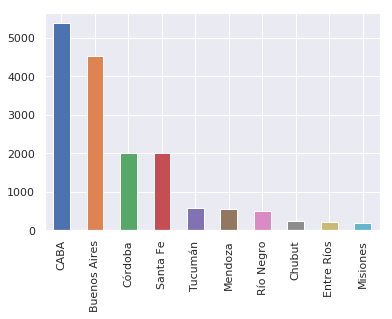

In [4]:
provincias = proy['provincia_de_ejecución'].value_counts()
provincias[:10].plot(kind = 'bar')

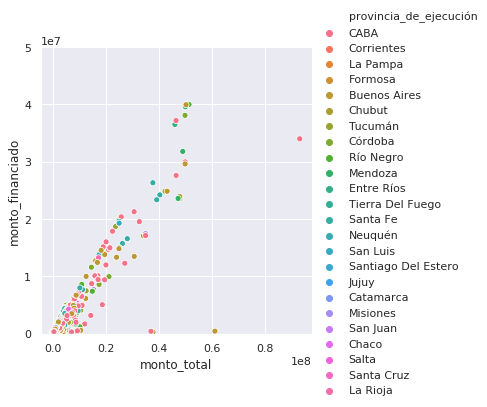

In [20]:
resumen = proy[['monto_total', 'monto_financiado', 'provincia_de_ejecución']]
g = sns.relplot(x='monto_total', y='monto_financiado', data=resumen, hue='provincia_de_ejecución')
g.set(ylim=(0, 50000000))

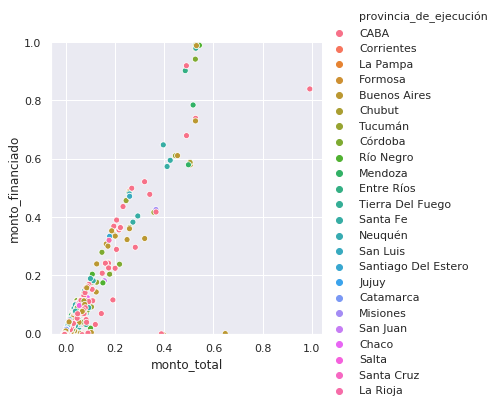

In [28]:
# Normalizando la ecuacion, nos quedan valores entre 0 y 1.
proy.monto_total = (proy.monto_total - proy.monto_total.mean()) / (proy.monto_total.max()-proy.monto_total.min())
proy.monto_financiado = (proy.monto_financiado - proy.monto_financiado.mean()) / (proy.monto_financiado.max()-proy.monto_financiado.min())
resumennor = proy[['monto_total', 'monto_financiado', 'provincia_de_ejecución']]
gnorm = sns.relplot(x='monto_total', y='monto_financiado', data=resumennor, hue='provincia_de_ejecución')
gnorm.set(ylim=(0, 1))

In [63]:
# m denotes the number of examples here, not the number of features
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        # print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    return theta


# get data from table
x, y = proy.monto_total, proy.monto_financiado
m, n = np.shape(x), np.shape(y)
numIterations= 1000
alpha = 0.0005
theta = np.ones(n)
theta = gradientDescent(x, y, theta, alpha, m, numIterations)
print(theta)

[1.00047429 1.00047429 1.00047429 ... 1.00047429 1.00047429 1.00047429]


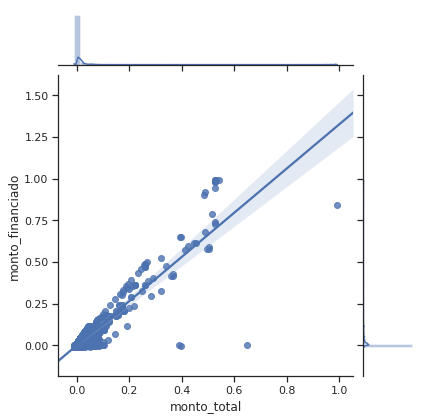

In [73]:
glin = sns.jointplot(x="monto_total", y="monto_financiado", data=proy, kind="reg");



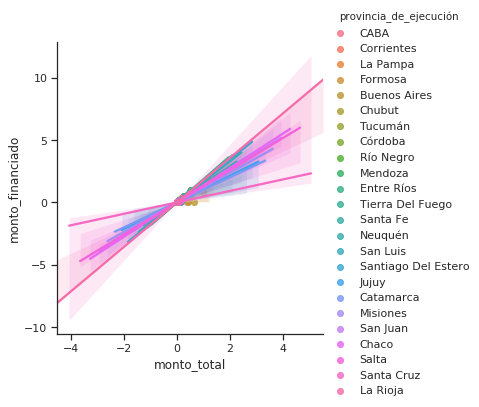

In [74]:
glm = sns.lmplot(x="monto_total", y="monto_financiado", hue= 'provincia_de_ejecución', data=proy);

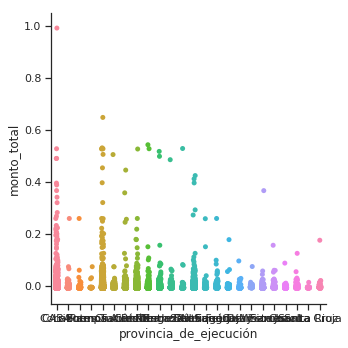

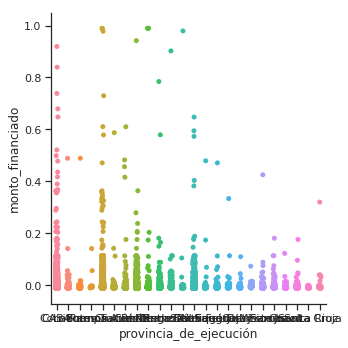

In [84]:
# Podriamos tambien analizar en profundidad las distintas provincias.
sns.catplot(x="provincia_de_ejecución", y="monto_total", data=proy);
sns.catplot(x="provincia_de_ejecución", y="monto_financiado", data=proy);
